# Model Structure and Selection Criterion

# Model Structures - Defining the Model Set

# Recall the Predictor

$$
\hat{y}(t|t-1,\theta) = H^{-1}(q,\theta)G(q,\theta)u(t) + (1-H^{-1}(q,\theta))y(t)
$$

Need to choose how to parameterize $G(q,\theta)$ and $H(q,\theta)$. 

Let $A(q,\theta)$, $B(q,\theta)$, $C(q,\theta)$, $D(q,\theta)$ and $F(q,\theta)$ be polynomials in $q$:
$$
\begin{align*}
A(q,\theta_a) &= 1 + a_1q^{-1} + a_2q^{-2} + \cdots + a_{n_a}q^{-n_a} \\
B(q,\theta_b) &= b_0 + b_1q^{-1} + b_2q^{-2} + \cdots + b_{n_b}q^{-n_b} \\
C(q,\theta_c) &= 1 + c_1q^{-1} + c_2q^{-2} + \cdots + c_{n_c}q^{-n_c} \\
D(q,\theta_d) &= 1 + d_1q^{-1} + d_2q^{-2} + \cdots + d_{n_d}q^{-n_d} \\
F(q,\theta_f) &= 1 + f_1q^{-1} + f_2q^{-2} + \cdots + f_{n_f}q^{-n_f} 
\end{align*}
$$
where $\theta$ represents the unknown parameters:
$$
\begin{align*}
\theta_a &= \big[a_1 \ \cdots \ a_{n_a}\big]^T \\
\theta_b &= \big[b_1 \ \cdots \ b_{n_b}\big]^T \\
\theta_c &= \big[c_1 \ \cdots \ c_{n_c}\big]^T \\
\theta_d &= \big[d_1 \ \cdots \ d_{n_d}\big]^T \\
\theta_f &= \big[f_1 \ \cdots \ f_{n_f}\big]^T 
\end{align*}
$$

# Common Parameterizations

| Model Name | Equation      | $G(z,\theta)$ | $H(z,\theta)$        | $\theta$ | 
| --------- | -------- | -------- | ------- | ------- |
| ARX | $y(t) = \frac{B(q,\theta)}{A(q,\theta)}u(t) + \frac{1}{A(q,\theta)}e(t)$ | $\frac{B(q,\theta)}{A(q,\theta)}$ | $\frac{1}{A(q,\theta)}$ | $\big [ \theta_a^T \ \theta_b^T  \big ]^T$ |
| ARMAX | $y(t) = \frac{B(q,\theta)}{A(q,\theta)}u(t) + \frac{C(q,\theta)}{A(q,\theta)}e(t)$ | $\frac{B(q,\theta)}{A(q,\theta)}$ | $\frac{C(q,\theta)}{A(q,\theta)}$ | $\big [ \theta_a^T \ \theta_b^T \ \theta_c^T \big ]^T$ |
| Output Error (OE) | $y(t) = \frac{B(q,\theta)}{F(q,\theta)}u(t) + e(t)$ | $\frac{B(q,\theta)}{F(q,\theta)}$ | $1$ | $\big [ \theta_b^T \ \theta_f^T \big ]^T$ |
| Finite Impulse Repsonse (FIR) | $y(t) = B(q,\theta)u(t) + e(t)$ | $B(q,\theta)$ | $1$ | $\theta_b^T$ |
| Box-Jenkins | $y(t) = \frac{B(q,\theta)}{F(q,\theta)}u(t) + \frac{C(q,\theta)}{D(q,\theta)}e(t)$ | $\frac{B(q,\theta)}{F(q,\theta)}$ | $\frac{C(q,\theta)}{D(q,\theta)}$ | $\big [ \theta_b^T \ \theta_c^T \ \theta_d^T \ \theta_f^T \big ]^T$ |



# Selection Criterion

Prediction error:
$$
\varepsilon(t,\theta) = y(t) - \hat{y}(t|t-1,\theta)
$$
Sum of squared prediction errors:
$$
V_N(\theta) = \sum_{t=0}^{N-1} \varepsilon(t,\theta)^2
$$


In the following text we will analyze some advantages and disadvantages for each of the model structures. 

# ARX model structure
We will start by analyzing the ARX model structure. 

In this case, the predictor has the form:
$$
\begin{align*}
\hat{y}(t|t-1,\theta) &= H^{-1}(q,\theta)G(q,\theta)u(t) + (1-H^{-1}(q,\theta))y(t) \\
&=A(q,\theta)\frac{B(q,\theta)}{A(q,\theta)} u(t) + (1- A(q,\theta))y(t) \\
&=B(q,\theta) u(t) - (1- A(q,\theta))y(t)
\end{align*}
$$
Prediction Error:
$$
\begin{align*}
\varepsilon(t,\theta) &=  y(t) - \hat{y}(t|t-1,\theta)\\
&= B(q,\theta)u(t) - A(q,\theta)y(t)
\end{align*}
$$
Suppose $G$ is parameterized as:
$$
G(q,\theta) = \frac{b_0+b_1q^{-1}}{1+a_1q^{-1}}.
$$
Then the prediction error can be expressed as:
$$
\begin{align*}
\varepsilon(t,\theta) &= b_0u(t) + b_1q^{-1}u(t) - y(t) - a_1q^{-1}y(t) \\
&=  b_0u(t) + b_1u(t-1) - y(t) - a_1y(t-1) \\
&= \begin{bmatrix} -y(t-1) & u(t) & u(t-1)\end{bmatrix} \begin{bmatrix} a_1 \\ b_0 \\ b_1 \end{bmatrix} - y(t)
\end{align*}
$$

# Finding the model that minimizes the mean squared prediction error for a model with the ARX model structure

For the ARX model structure, it turns out that we can derive and expression for the optimal solution (i.e. the model that minimizes the sum of squared prediction errors). 

When deriving this expression, it is useful to write the objective function in terms of matrices and arrays.
$$
V_N = \sum_{t=0}^{N-1} \varepsilon^2(t,\theta) = \vec{\varepsilon}(\theta)^T \vec{\varepsilon}(\theta)
$$
where 
$$
\vec{\varepsilon}(\theta) = \begin{bmatrix} \varepsilon(0,\theta) \\ \varepsilon(1,\theta) \\ \vdots \\ \varepsilon(N-1,\theta) \end{bmatrix}.
$$

Using the matrix expression for $\varepsilon$ derived in the previous slide, we can construct a matrix equation for $\vec{\varepsilon}$:
$$ 
\begin{align*}
\begin{bmatrix} \varepsilon(0,\theta) \\ \varepsilon(1,\theta) \\ \vdots \\ \varepsilon(N-1,\theta) \end{bmatrix} &=
\begin{bmatrix} 
-y(-1) & u(0) & u(-1)  \\ 
-y(0) & u(1) & u(0)  \\ 
-y(1) & u(2) & u(1)  \\ 
-y(2) & u(3) & u(2)  \\ 
\vdots & \vdots & \vdots \\
-y(N-1) & u(N) & u(N-1) \end{bmatrix} -
\begin{bmatrix} y(1) \\ y(2) \\ y(3) \\ \vdots \\ y(N) \end{bmatrix} \\
\vec{\varepsilon}(\theta) &= \phi \theta + \vec{y},
\end{align*}
$$
where $\phi$, and $\vec{y}$ are implicitly defined.

To find the minimum of this objective function we will take the following steps:
1. Derive an expression for the derivative of the objective function $V_N$.
2. Set the derivative to zero. This results in an equation that is satisfied at any local minumum, maximum, or inflection point of the objective function.
3. Solve the equation from step 2 for $\theta$, call it $\hat{\theta}$. Now we have an expression for $\theta$ at any minimum, maximum or inflection point of $V_N$. It turns out that this objective function only has 1 minimum. So $\hat{\theta}$ is a global minimizer of $V_N$. 
4. From $\hat{\theta}$ we can construct an estmate of the system transfer function $G(q,\hat{\theta})$. 



# Aside on Vector Calculus

Before we proceed, need to drive a few expressions for derivatives involving vectors and matrices. 

When we take the derivative of a scalar function $f(\vec{x})$ with respect to a ($n \times 1$) vector, $\vec{x}$, what we actually mean is that we want to calculate the derivative of $f(\vec{x})$ with respect to each element of $\vec{x}$. Let 
$$
\frac{df}{d\vec{x}} = \begin{bmatrix} \frac{df}{dx_1} \\ \frac{df}{dx_2} \\ \vdots \\ \frac{df}{dx_n} \end{bmatrix}
$$

Similarly, suppose that the function $\vec{g}(\vec{x})$ is a ($m \times 1$) vector, and $\vec{x}$ is a ($n \times 1$) vector. Then, taking the derivative of a vector with respect to a vector is defined as:
$$
\frac{d\vec{g}}{d\vec{x}} = \begin{bmatrix} \frac{dg_1}{dx_1} & \cdots & \frac{dg_m}{dx_1} \\ 
\frac{dg_1}{dx_2} & \cdots & \frac{dg_m}{dx_2} \\ 
\vdots & & \vdots \\
\frac{dg_1}{dx_n} & \cdots & \frac{dg_m}{dx_n} \end{bmatrix}.
$$

# Some Selected Identities

# Identity 1
Let $\vec{x}$ be a vector and $A$ be a matrix (of appropriate dimensions). Consider the following identity:
$$
\frac{\text{d}}{\text{d}\vec{x}} \vec{x}^TA = A
$$

As an illustration of the identity (to convince you that it is true), consider ($3 \times 1$) vector $\vec{x}$ and a $(2 \times 3)$ matrix $A$. Let's calculate the derivative to verify the identity:
$$
\begin{align*}
\frac{d}{d\vec{x}} \vec{x}^T A &=\frac{d}{d\vec{x}} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}\end{bmatrix} \\
&= \frac{d}{d\vec{x}} \begin{bmatrix} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31} &  x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32}\end{bmatrix} \\
&= \begin{bmatrix} \frac{d}{dx_1} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31} &\frac{d}{dx_1}x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32} \\
\frac{d}{dx_2} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31}  &\frac{d}{dx_2}x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32} \\
\frac{d}{dx_3} x_1 a_{11} + x_2 a_{21}+ x_3 a_{31} & \frac{d}{dx_3}x_1 a_{12}+ x_2 a_{22}+ x_3 a_{32}\end{bmatrix}\\
&=\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}\end{bmatrix} \\
&=A
\end{align*}
$$

# Identity 2

Let $\vec{x}$ be a vector. Consider the following identity:
$$
\frac{\text{d}}{\text{dx}} A\vec{x} = A^T
$$
Similarly, consider the following illustration of the identity for a $(2 \times 1)$ vector $\vec{x}$ and a ($3 \times 2$) matrix $A$:
$$
\begin{align*}
\frac{\text{d}}{\text{dx}} A\vec{x} &= \frac{\text{d}}{\text{dx}} \begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \\ a_{31} & a_{32}\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
&= \frac{\text{d}}{\text{dx}} \begin{bmatrix}a_{11}x_1 + a_{12}x_2 \\ a_{21}x_1 + a_{22}x_2 \\a_{31}x_1 + a_{32}x_2 \end{bmatrix}\\
&=\begin{bmatrix} \frac{\text{d}}{dx_1}a_{11}x_1 + a_{12}x_2 & \frac{\text{d}}{dx_1}a_{21}x_1 + a_{22}x_2 &\frac{\text{d}}{dx_1}a_{31}x_1 + a_{32}x_2 \\
\frac{\text{d}}{dx_2}a_{11}x_1 + a_{12}x_2 & \frac{\text{d}}{dx_2}a_{21}x_1 + a_{22}x_2 &\frac{\text{d}}{dx_3}a_{31}x_1 + a_{32}x_2 \end{bmatrix} \\
&= \begin{bmatrix} a_{11} & a_{21} & a_{31} \\ a_{12} & a_{22} & a_{32}\end{bmatrix} \\
&= A^T
\end{align*}
$$


# Identity 3
Let $\vec{x}$ be a vector. Consider the following identity:
$$
\frac{\text{d}}{\text{dx}} \vec{x}^TA\vec{x} = A\vec{x} + A^T\vec{x} 
$$
Again, consider the following illustration of the identity for a $(3 \times 1)$ vector $\vec{x}$ and a ($3 \times 3$) matrix $A$:
$$
\begin{align*}
\frac{\text{d}}{\text{dx}} \vec{x}^TA\vec{x} &= \frac{\text{d}}{\text{dx}} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix}
\begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\
&=\frac{\text{d}}{\text{dx}} \begin{bmatrix} x_1 & x_2 & x_3 \end{bmatrix} \begin{bmatrix}a_{11}x_1 + a_{12}x_2 + a_{13}x_3 \\ a_{21}x_1 + a_{22}x_2+a_{23}x_3 \\ a_{31}x_1 + a_{32}x_2 + a_{33}x_3\end{bmatrix}\\
&=\frac{\text{d}}{\text{dx}} (a_{11}x_1^2 + a_{12}x_1x_2 + a_{13}x_1x_3 + a_{21}x_2x_1 + a_{22}x_2^2+a_{23}x_2x_3 + a_{31}x_3x_1 + a_{32}x_3x_2 + a_{33}x_3^2) \\
&=\begin{bmatrix} 2a_{11}x_1 + a_{12}x_2 + a_{21}x_2 + a_{13}x_3 + a_{31}x_3  \\
a_{12}x_1 + a_{21}x_1 + 2a_{22}x_2 + a_{23}x_3 + a_{32}x_3  \\
a_{13}x_1 + a_{31}x_1 + a_{23}x_2 + a_{32}x_2 + 2a_{33}x_3 \end{bmatrix} \\
&=\begin{bmatrix} 2a_{11}x_1 + (a_{12}+a_{21})x_2 + (a_{13} + a_{31})x_3  \\
(a_{12} + a_{21})x_1 + 2a_{22}x_2 + (a_{23} + a_{32})x_3  \\
(a_{13} + a_{31})x_1 + (a_{23} + a_{32})x_2 + 2a_{33}x_3 \end{bmatrix} \\
&= \Bigg( \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix} + \begin{bmatrix} a_{11} & a_{21} & a_{31} \\ a_{12} & a_{22} & a_{32} \\ a_{13} & a_{23} & a_{33} \end{bmatrix} \Bigg ) \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \\
&= A\vec{x} + A^T \vec{x}
\end{align*}
$$

# Back to calculating minimizer of $V_{N}$ for a model with ARX model structure

Recall the expression for the prediction error that we derived (before the aside on matrix calculus):
$$
\vec{\varepsilon}(\theta) = \phi \theta + \vec{y}.
$$
Then the expression for the sum of squared prediction errors is:
$$
\begin{align*}
V_N &= (\phi \theta + \vec{y})^T(\phi \theta + \vec{y}) \\
&= \theta^T\phi^T\phi\theta + \theta^T\phi^T\vec{y} +\vec{y}^T\phi\theta + \vec{y}^T\vec{y}
\end{align*}
$$
Now, using the matrix calculus identities, we can calculate the derivative of $V_N$ with respect to $\theta$:
$$
\begin{align*}
\frac{dV_{N}}{d\theta} &= 2\phi^T\phi\theta - \phi^T\vec{y} - \phi^T\vec{y} \\
&= 2\phi^T\phi\theta - 2\phi^T\vec{y}
\end{align*}
$$
Setting the derivative to zero and solving for $\theta$ results in:
$$
\begin{align*}
2\phi^T\phi\hat{\theta} - 2\phi^T\vec{y} &= 0 \\
\phi^T\phi\hat{\theta} &= \phi^T\vec{y} \\
\hat{\theta} &= (\phi^T\phi)^{-1}\phi^T\vec{y} 
\end{align*}
$$
where, for now, we will assume that the data is such that the inverse of $\phi^T\phi$ exists. Thus we have obtained an expression for the parameter vector $\hat{\theta}$ that minimizes the sum of squared prediction errors for a model with the ARX model structure! Using this parameter vector, we can construct an estimate for the plant:
$$
G(q,\hat{\theta})= \frac{B(q,\hat{\theta})}{A(q,\hat{\theta})}
$$

# Experiment 1

- Given the correct number of poles and zeros of the plant and noise model, obtain an estimate of the plant dynamics using a model with ARX model structure.
- Are estimated plant dynamics biased?


In [1]:
import sysid_pem as sid
import numpy as np
import scipy as sp
import control as ct
import matplotlib.pyplot as plt

In [19]:
def generate_data(B0,C0,D0,F0,N):
    u = np.random.randn(N)
    #v = sp.signal.lfilter(C0, D0, np.random.randn(N))
    #y = sp.signal.lfilter(B0, F0, u) #+ v
    e = np.random.randn(N)
    H0 = ct.tf(C0,D0,True)
    tt,v = ct.forced_response(H0,U=e)
    G0 = ct.tf(B0,F0,True)
    tt,y = ct.forced_response(G0,U=u)
    y = y + 0.5*v
    return u, y

In [20]:
F0 = np.real(np.convolve([1, -0.2+0.8j],np.convolve([1, -0.2-0.8j],np.convolve([1, -0.6+0.7j],[1, -0.6-0.7j]))))
B0 = np.real(np.convolve([1, -0.7+0.2j],[1, -0.7-0.2j]))
C0 = np.real(np.convolve([1, 0.1+0.9j],[1, 0.1-0.9j]))
D0 = np.real(np.convolve([1, -0.5+0.75j],[1, -0.5-0.75j]))
 
G0 = ct.tf(B0,F0,True)
H0 = ct.tf(C0,D0,True)
print('Data Generating System:')
print('Plant:', G0)
print('Noise:', H0)

N = 1001


na = 4
nb = 3
nk = 2
n_arx = [na, nb, nk]

num_iter = 100
poles_arx = np.empty((num_iter,na),dtype=complex)
for ii in range(num_iter):
    u, y = generate_data(B0,C0,D0,F0,N)
  
    theta_arx = sid.V_arx_lin_reg(n_arx,y,u)
    poles_arx[ii,:] = np.roots(np.concatenate(([1],theta_arx[0:na])))



Data Generating System:
Plant: 
            z^2 - 1.4 z + 0.53
------------------------------------------
z^4 - 1.6 z^3 + 2.01 z^2 - 1.156 z + 0.578

Noise: 
z^2 + 0.2 z + 0.82
------------------
 z^2 - z + 0.8125



Text(0.5, 0, 'Real')

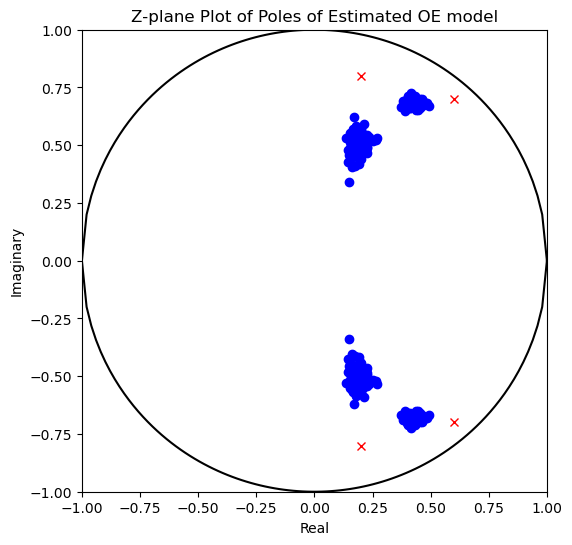

In [22]:
fig,ax = plt.subplots(1, figsize=(6,6))
for ii in range(num_iter):
    ax.plot(np.real(poles_arx[ii,:]), np.imag(poles_arx[ii,:]), 'bo')

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
xc = np.linspace(-1,1,100)
yc = np.sqrt(1-xc**2)
ax.plot(xc,yc,'k')
ax.plot(xc,-yc,'k')

ax.plot(0.2,0.8,'rx')
ax.plot(0.2,-0.8,'rx')
ax.plot(0.6,0.7,'rx')
ax.plot(0.6,-0.7,'rx')

ax.set_title('Z-plane Plot of Poles of Estimated OE model')
ax.set_ylabel('Imaginary')
ax.set_xlabel('Real')


# Results

![exp1](exp1.png "Experiment 1")

Note that the poles of the data generating system are: $0.5 \pm j0.6$.

# Observations

# Tabulate Results - Open Loop Data Generating System

| Model Structure | Plant Model Biased? | Noise Model Biased? | 
| --- | --- | --- | 
| Box-Jenkins | not biased  | not biased |
| ARX | biased | biased |
| OE | not biased | biased |

Main Observations:
- Even though the noise model changes from Box Jenkins to OE, the estimated poles of the plant are still unbiased. This can be generalized as a statement: In open loop identification, if the plant and noise model are parameterized independently (i.e. the plant and noise model do not share parameters) and the plant model has the correct order of numerator and denominator, then the plant estimate will be unbiased."
- If the plant and noise model share parameters however, as in the ARX, then the plant and noise model will be biased. 

# Experiment 2

- Given the correct number of poles and zeros of the plant and noise model.
- How does the bias vary for increasing noise power for the Box-Jenkins model structure?
- How does the bias vary for increasing noise power for the ARX model structure?

# Results

![exp2a](exp2a.png "Experiment 2a")
![exp2b](exp2b.png "Experiment 2b")
![exp2c](exp2c.png "Experiment 2c")

Note for each of these experiments the poles of the data generating system are: $0.5 \pm j0.6$.

# Observations

If the mean of the estimated poles is equal to the true poles, then the estimated poles are unbiased.
Equivalently, if the center of the cluster of estimated poles is equal to the true poles, then the estimate is unbiased.

The size of the cluster is equal to the variance. The more spread out the estimates are, the higher the variance. 

Observations:
- Box Jenkins and Output-Error result in unbiased estimates of the poles
- The more noise in the data, the higher the variance of the estimated poles
- ARX is biased. For increasing noise, the bias increases, and also the variance increases.
- Box-Jenkins estimates have less variance than Output-Error estimates. In general (for models where plant and noise model do not share parameters): even though the noise model does not affect the bias of the plant poles, adding a noise model will reduce the variance of the estimated poles. The better the noise is modelled, the lower the variance of the estimated poles. 

# Using Equations

We can derive an expression of the prediction error, which shows why in open loop we do not need to have the "correct" noise model to still obtain unbiased estimates of the plant.

After some algebra, we can write the expected value of the sum of squared prediction errors of an infinitely long data set (denoted $V$) as:
$$
\begin{align*}
V &= \lim_{N \to \infty} \frac{1}{N} \sum_{t=0}^{N-1} \mathbb{E}[ \epsilon^2(t) ] \\
&= \frac{1}{2\pi} \int^{\pi}_{\pi} | H^{-1}(\omega,\theta) \Delta G(\omega,\theta)|^2 \Phi_u(\omega) +  | H^{-1}(\omega,\theta) \Delta H(\omega,\theta)|^2 \sigma_e^2 d\omega + \sigma_e^2
\end{align*}
$$
where $\Delta G(\omega) = G(\omega) - G(\omega,\theta)$ and $\Delta H(\omega) = H(\omega) - H(\omega,\theta)$. $\Phi_u$ is the power spectral density of the input $u$ and is defined as:
$$
\begin{align*}
\Phi_u(\omega) &= \mathcal{F}[R_u(\tau)] \\
&= U(\omega)U(\omega)^*
\end{align*}
$$
where superscirpt $*$ denotes complex conjugate. Note that because $e$ is a white noise sequence we have:
$$
\begin{align*}
\Phi_e(\omega) &= \mathcal{F}[R_e(\tau)] \\
&= \mathcal{F}[\sigma^2_e \delta(\tau)] \\
&= \sigma_e^2.
\end{align*}
$$
Let's analyze the expression for $V$. The main observations are:
- $V$ consists of 3 terms that are always positive. This means that minimizing $V$ must happen by making each of these terms smaller (they can not cancel each other out)
- The last term $\sigma_e^2$ is not a function of $\theta$, so it cannot be minimized. So we can conclude that $V(\theta) \ge \sigma_e^2$ for any $\theta$.
- Setting $G(\theta) = G$ and $H(\theta)=H$ results in $V(\theta) = \sigma_e^2$, and so $G(\theta) = G$ and $H(\theta)=H$ are the global minimizers of $V$.
- If $G(\theta)$ and $H(\theta)$ are parameterized independently, then each of the first two terms can be minimized independently. For example, set $H(\theta)=1$. The second term can not be made any smaller than $\int_{-\pi}^{\pi}|H(\omega)-1|^2\sigma_e^2d\omega$. However, we cna still set the first term to $0$ by choosing $G(\theta)=G$. So even when we select the wrong noise model, we can still obtain an unbiased estimate of $G$. This is a very nice result for open loop identification. It means that we don't have to worry about the noise model that much. 
- If $G$ and $H$ are not parameterized independently (like in the case of ARX), then the above reasoning does not hold. In the case of ARX, $B(\theta)$ can be used to minimized the first term, but $A(\theta)$ appears in the first two terms. So $A(\theta)$ is attempting to find a balance in minimizing both the first and second terms together, it cannot set either of them to exactly zero. Note that if $\sigma_e^2=0$ (second term is zero), then $\frac{B(\theta)}{A(\theta)} = G$ would set the first term to zero and that would be the global optimum of $V$. On the otherhand if $\Phi_u(\omega)=0$ for all $\omega$, then the parameters where $\frac{1}{A(\theta)-H}$ is the smallest would be the global optimum. In general the optimal ARX will be somewhere in between these two extremes when neither $\Phi_u$ and $\sigma_e^2$ are zero. 

Please take the time to connect each of these statements to the results of the Experiment 2. It is important to understand how the practical observations connect to the equations.


# Algorithm

Based on these results, a common way to initialize the Box-Jenkins model is to first estimate an ARX model, and use the results of the ARX model to initialize the Box-Jenkins model

In [3]:
n_arx = [2, 3]
theta_arx = V_arx_lin_reg(n_arx,y,u)

G_hat_arx,H_hat_arx=theta_2_tf_arx(theta_arx,n_arx)
print('\n\nARX Model Structure:')
print('Estimated G:')
print(G_hat_arx)
print('Estimated H:')
print(H_hat_arx)


#theta0 = [2, 0.7, -0.9, -0.4, -0.9, -1, 0.9725] #np.array([1, 1]) #choose an starting point for the optimization
theta_box_jenkins = np.concatenate((theta_arx[n_arx[0]:np.sum(n_arx)],[-0.4, -0.9],theta_arx[0:n_arx[0]]))
print(theta_box_jenkins)
n = [3, 1, 1, 2]
optimization_results = sp.optimize.minimize(V_box_jenkins, theta_box_jenkins, args=(n,y,u))
G_hat_box_jenkins,H_hat_box_jenkins=theta_2_tf_box_jenkins(optimization_results.x,n)

print('\n\nBox Jenkins Model Structure:')
print('Initial value of objective function:', V_box_jenkins(theta_box_jenkins,n,y,u))
print('Final value of objective function:', optimization_results.fun)
print('Estimated G:')
print(G_hat_box_jenkins)
print('Estimated H:')
print(H_hat_box_jenkins)
print('Value of x at final value of objective function:', optimization_results.x)
poles_box_jenkins = np.roots(np.concatenate(([1],optimization_results.x[n[0]+n[1]+n[2]:n[0]+n[1]+n[2]+n[3]])))
print('Poles of estimated G:',poles_box_jenkins)




ARX Model Structure:
Estimated G:

2.036 z^2 + 0.7899 z - 0.9446
-----------------------------
   z^2 - 0.9968 z + 0.9561

Estimated H:

          z^2
-----------------------
z^2 - 0.9968 z + 0.9561

[ 2.03567755  0.78994406 -0.94464913 -0.4        -0.9        -0.99682576
  0.95606341]


Box Jenkins Model Structure:
Initial value of objective function: 9812.00611041129
Final value of objective function: 1030.3533346892118
Estimated G:

1.982 z^2 + 0.7134 z - 0.9436
-----------------------------
      z^2 - z + 0.9723

dt = 1

Estimated H:

z - 0.2927
----------
z - 0.8217

dt = 1

Value of x at final value of objective function: [ 1.98243345  0.71343561 -0.94362959 -0.29265057 -0.82168449 -1.00009985
  0.9722546 ]
Poles of estimated G: [0.50004993+0.84982626j 0.50004993-0.84982626j]


# Experiment 3

- How does the bias vary for changing number of poles of the Box-Jenkins model structure?

# Results

![exp3a](exp3a.png "Experiment 3a")
![exp3b](exp3b.png "Experiment 3b")

Note:
- for each of these experiments the poles of the data generating system are: $0.5 \pm j0.6$.
- In plot 2, the number of parameters in the numerator polynomial is held constant at 2.
- The plant in the data generating system is:
$$
G_0(z) = \frac{2 z^2 + 0.7 z - 0.9}{z^2 - z + 0.61}
$$

# Observations
- If the data generating system is in the model set (i.e. there exists a parameter vector corresponding to the true parameters of the data generating system), then the global minimum of the objective function is the true parameter vector. 
- If the data generating system is not in the model set, then the estimated plant model will be biased. 
- In the first plot there for the case where $n_b=n_f+1=3$ and $n_b=n_f+1=4$ the data generating system is in the model set. So the poles are estimated without bias. 
- In the case $n_b=n_f+1=4$ there is a pole-zero cancellation required to recover the plant dynamics of the data generating system, but this is no problem:
$$
G_0(z) = \frac{(2 z^2 + 0.7 z - 0.9)(z-a)}{(z^2 - z + 0.61)(z-a)}
$$
where $a$ can be any number between -1 and 1, and we still recover the true plant dynamics. 
- In the second plot, there is no case where the data generating system is in the model set, so all estimates are biased.




In [4]:
na = 3
nb = 4
nc = 1
nd = 1
nf = na
n_arx = [na, nb]
theta_arx = V_arx_lin_reg(n_arx,y,u)

G_hat_arx,H_hat_arx=theta_2_tf_arx(theta_arx,n_arx)
print('\n\nARX Model Structure:')
print('Estimated G:')
print(G_hat_arx)
print('Estimated H:')
print(H_hat_arx)


#theta0 = [2, 0.7, -0.9, -0.4, -0.9, -1, 0.9725] #np.array([1, 1]) #choose an starting point for the optimization
theta_box_jenkins = np.concatenate((theta_arx[n_arx[0]:np.sum(n_arx)],[-0.4, -0.9],theta_arx[0:n_arx[0]]))
print(theta_box_jenkins)
n = [nb, nc, nd, nf]
optimization_results = sp.optimize.minimize(V_box_jenkins, theta_box_jenkins, args=(n,y,u))
G_hat_box_jenkins,H_hat_box_jenkins=theta_2_tf_box_jenkins(optimization_results.x,n)

print('\n\nBox Jenkins Model Structure:')
print('Initial value of objective function:', V_box_jenkins(theta_box_jenkins,n,y,u))
print('Final value of objective function:', optimization_results.fun)
print('Estimated G:')
print(G_hat_box_jenkins)
print('Estimated H:')
print(H_hat_box_jenkins)
print('Value of x at final value of objective function:', optimization_results.x)
poles_box_jenkins = np.roots(np.concatenate(([1],optimization_results.x[n[0]+n[1]+n[2]:n[0]+n[1]+n[2]+n[3]])))
print('Poles of estimated G:',poles_box_jenkins)




ARX Model Structure:
Estimated G:

2.04 z^3 + 0.8481 z^2 - 0.9259 z - 0.01307
------------------------------------------
  z^3 - 0.9684 z^2 + 0.9275 z + 0.02825

Estimated H:

                 z^3
-------------------------------------
z^3 - 0.9684 z^2 + 0.9275 z + 0.02825

[ 2.03960707  0.84813958 -0.92592435 -0.0130709  -0.4        -0.9
 -0.96844911  0.92746889  0.02824593]


Box Jenkins Model Structure:
Initial value of objective function: 9581.92941049074
Final value of objective function: 1029.706452835786
Estimated G:

1.99 z^3 + 0.7093 z^2 - 0.9673 z + 0.03505
------------------------------------------
   z^3 - 1.01 z^2 + 0.9822 z - 0.009654

dt = 1

Estimated H:

z - 0.2908
----------
z - 0.8205

dt = 1

Value of x at final value of objective function: [ 1.99009342  0.70926852 -0.96725089  0.03505387 -0.2908085  -0.82054758
 -1.01005094  0.98221981 -0.00965357]
Poles of estimated G: [0.50006112+0.84984044j 0.50006112-0.84984044j 0.0099287 +0.j        ]


# Experiment 4

- How do the estimation results change for different inputs?
- Try a sinusoid and multisine


In [4]:
na = 2
nb = 3
nc = 1
nd = 1
nf = na


N = 1001
t = np.linspace(0,10,N)
P = 50
f_vec = [1]
u = np.zeros(N)
for f in f_vec:
    u += np.sin(2*np.pi*f*t) ## add your code here

v = sp.signal.lfilter(C, D, np.random.randn(N))
y = sp.signal.lfilter(B,F, u) + v

n_arx = [na, nb]
theta_arx = V_arx_lin_reg(n_arx,y,u)

G_hat_arx,H_hat_arx=theta_2_tf_arx(theta_arx,n_arx)
print('\n\nARX Model Structure:')
print('Estimated G:')
print(G_hat_arx)
print('Estimated H:')
print(H_hat_arx)
poles_arx = np.roots(np.concatenate(([1],optimization_results.x[0:na])))
print('Poles of estimated G:',poles_arx)




ARX Model Structure:
Estimated G:

 -18 z^2 + 30 z - 15
----------------------
z^2 - 1.122 z - 0.3534

Estimated H:

         z^2
----------------------
z^2 - 1.122 z - 0.3534

Poles of estimated G: [0.50035341+0.8446047j 0.50035341-0.8446047j]


In [5]:
def predcited_output_arx(theta, n, y, u):
    t0 = np.sum(n)
    phi = np.zeros((N-t0,np.sum(n)))
    for ii in range(N-t0):
        for jj in range(n[0]):
            phi[ii,jj] = -y[ii+t0-jj-1]
    
    for ii in range(N-t0):
        for jj in range(n[1]):
            phi[ii,jj+n[0]] = u[ii+t0-jj]

    y_hat = phi @ theta
    #theta = np.linalg.inv( phi.T @ phi ) @ (phi.T @ y[t0:N])
    return y_hat


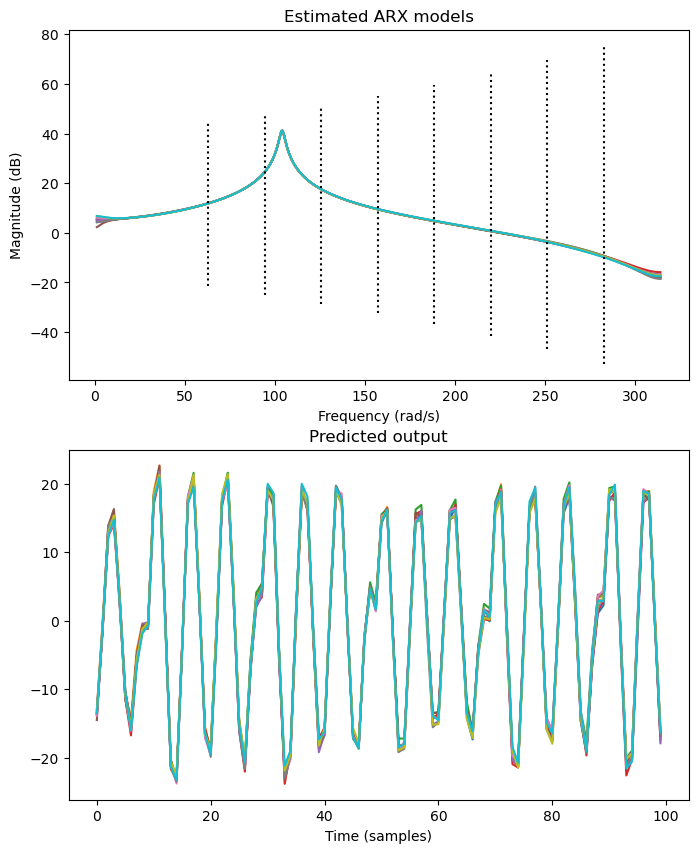

In [10]:
import control as ct
import numpy as np
import scipy as sp  
import matplotlib.pyplot as plt

na = 5
nb = 6

N = 1001
t = np.linspace(0,10,N)
Ts = t[1]-t[0]
fs = 1/Ts

f_vec = [10, 15, 20, 25, 30, 35, 40, 45]
u = np.zeros(N)
for f in f_vec:
    u += np.sin(2*np.pi*f*t) 

num_exp = 10

fig,ax = plt.subplots(2,1,figsize=(8,10))
for ii in range(num_exp):
    v = 0.5*sp.signal.lfilter(C, D, np.random.randn(N))
    y = sp.signal.lfilter(B,F, u) + v

    n_arx = [na, nb]
    theta_arx = V_arx_lin_reg(n_arx,y,u)
    G_hat_arx,H_hat_arx=theta_2_tf_arx(theta_arx,n_arx)
    G_hat_Mag,G_hat_phase,omega = ct.bode_plot(G_hat_arx,plot=False)
    ax[0].plot(omega*fs,20*np.log10(np.abs(G_hat_Mag)))    
    y_hat = predcited_output_arx(theta_arx,n_arx,y,u)
    ax[1].plot(y_hat[0:100])

ax[0].set_title('Estimated ARX models')
ax[0].set_xlabel('Frequency (rad/s)')
ax[0].set_ylabel('Magnitude (dB)')
ax[1].set_title('Predicted output')
ax[1].set_xlabel('Time (samples)')

for f in f_vec:
    ax[0].plot([f*2*np.pi, f*2*np.pi], ax[0].get_ylim(), 'k:')




# Notes

When studying, please run the code in the cell above.

Observe the following:
- When exciting the system with only 1 sinusoid, many different models are estimated, but they are all the same at the frequency that was used to excite the system (denoted by a dotted black line).

![exp4a](exp4a.png "Experiment 4a")

- When exciting the system with 2 sinusoids, still different models are estimated, but they are all the same at the 2 frequencies that was used to excite the system (denoted by a dotted black lines). There is also starting to be less variation in all the different estimated models

![exp4b](exp4b.png "Experiment 4b")

- The more frequencies that are added to the input, the more similar the estimated models become.

![exp4c](exp4c.png "Experiment 4c")

- There is a point after which there all the models are pretty similar. When this point is reached, the data is said to be 'informative'.

![exp4d](exp4d.png "Experiment 4d")

 The point is:
- if we excite the system with a single sinusoid, many different models will result in the same prediction. In fact, every model that has the correct amplitude and phase at the excited frequency will predict the correct output. So there is no way to distinguish between all these different models (they are all different, they are only the same at one frequency). So the selection criterion essentially just selects one of these models at random.
- We need to make sure our data is informative so that two different models will not result in the same predictions of the output.
- As a general rule of thumb, for every parameter in the model, we need at least one sinusoid. So for a model with 2 poles and 2 zeros in plant model, and no noise model (OE model structure), we have 5 parameters to estimate, so we need to excite the system with an input that contains at least 5 different frequencies. 

# Informative Data

Data must provide sufficient excitation to the system so that we can distinguish between two models

Data set $Z$ is informative enough with respect to the model set $\mathcal{M}$ if for any two models in the model set, where $M_1$ has transfer functions $G_1(z)$, $H_1(z)$ and predicted outputs $\hat{y}_1$ and $M_2$ has transfer functions $G_2(z)$, $H_2(z)$ and predicted output $\hat{y}_2$ it holds that:
$$
\lim_{N \to \infty} \frac{1}{N} \sum_{t=0}^{N-1} \mathbb{E}\Big[(\hat{y}_1(t) - \hat{y}_2(t))^2 \Big] = 0
$$
implies that
$G_1(z)=G_2(z)$ and $H_1(z)=H_2(z)$.



# Are all informative data sets equally good?

Alternatively,

# Does it matter what inputs we use (as long as they are informative)?

# Variance of Estimated Frequency Response

$$
\text{Cov}\Big(\hat{G}_N(e^{j \omega})\Big) \approx \frac{n}{N}\frac{\Phi_v(\omega)}{\Phi_u(\omega)}
$$

where 
$$
\begin{align*}
\Phi_u(\omega) &= \mathcal{F}[R_u(\tau)] \\
&= U(e^{j \omega})U^*(e^{j \omega})
\end{align*}
$$
and
$$
\begin{align*}
\Phi_v(\omega) &= \mathcal{F}[R_v(\tau)] \\
&= V(e^{j \omega})V^*(e^{j \omega})
\end{align*}
$$

Comments:
- This is an approximate expression. 
- Don't actually know $v$, so can't calculate $\Phi_v$. 
- Can estimate $V$ as $\hat{V} = Y - G(\theta)U$.

What does this expression tell us?

Variance is a function of:
- number of parameters of model
- data length
- noise spectrum
- input spectrum

Run the code with both options for the input. Input with low frequency content, and an input with high frequency content.

C:\Users\arne.dankers2\AppData\Local\Temp\ipykernel_960\852905288.py:34: RuntimeWarning: overflow encountered in square
  return np.sum(epsilon**2)
C:\Users\arne.dankers2\Miniconda3\envs\enel441b\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\arne.dankers2\AppData\Local\Temp\ipykernel_960\852905288.py:34: RuntimeWarning: overflow encountered in square
  return np.sum(epsilon**2)


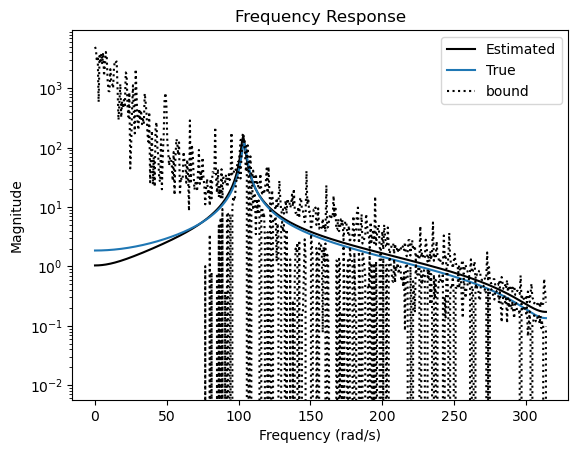

In [15]:
import control as ct
import numpy as np
import scipy as sp  
import matplotlib.pyplot as plt


# Data Generating System
F = np.real(np.convolve([1, -0.5+0.85j],[1, -0.5-0.85j]))
B = np.array([2, 0.7, -0.9])
G = ct.tf(B, F, Ts)
C = [1, -0.4]
D = [1, -0.9]
H = ct.tf(C,D,Ts)

N = 1001
t = np.linspace(0,10,N)
Ts = t[1]-t[0]
fs = 1/Ts

# try both options

#Bu,Au = sp.signal.butter(2,0.3,'low')
Bu,Au = sp.signal.butter(2,0.9,'high')

u = sp.signal.lfilter(Bu,Au,np.random.randn(N))
v = 0.5*sp.signal.lfilter(C, D, np.random.randn(N))
y = sp.signal.lfilter(B,F, u) + v
Phi_u = np.abs(np.fft.fft(u))**2
Phi_v = np.abs(np.fft.fft(v))**2

nf = 2
nb = 3
nc = 1
nd = 1
na = nf



    
n_arx = [nf, nb]
theta_arx = V_arx_lin_reg(n_arx,y,u)
theta_box_jenkins = np.concatenate((theta_arx[n_arx[0]:np.sum(n_arx)],[-0.4, -0.9],theta_arx[0:n_arx[0]]))  
n = [nb, nc, nd, nf]
optimization_results = sp.optimize.minimize(V_box_jenkins, theta_box_jenkins, args=(n,y,u))
G_hat_box_jenkins,H_hat_box_jenkins=theta_2_tf_box_jenkins(optimization_results.x,n,Ts=Ts)
omega = np.linspace(0,np.pi*fs,int(N/2)) 
G_hat_Mag,G_hat_phase,omega = ct.bode_plot(G_hat_box_jenkins,plot=False,omega=omega)

bound = np.sqrt(np.sum(n)/N*Phi_v/Phi_u)    

G_Mag,G_phase,omega = ct.bode_plot(G,plot=False,omega=omega)
fig,ax = plt.subplots(1)
ax.semilogy(omega,(np.abs(G_hat_Mag)),'k',label='Estimated')
ax.semilogy(omega,(np.abs(G_Mag)),label='True')
ax.semilogy(omega,np.abs(G_hat_Mag)+2*bound[0:int(N/2)],'k:',label='bound')
ax.semilogy(omega,np.abs(G_hat_Mag)-2*bound[0:int(N/2)],'k:')
ax.set_title('Frequency Response')
ax.set_ylabel('Magnitude')
ax.set_xlabel('Frequency (rad/s)')
ax.legend()


